# Ex 1 - Digit Classification

This notebook is a very simple exercise of training an ML model from start to finish to classify handwritten digits. It will explore the basics of installing and importing all of the required dependencies and downloading a dataset.

Some basic tools will be provided for you to visualise the data, then it is up to you to research, build, and train a model in whatever architecture you'd like with whatever framework you choose. 

### Install Dependencies

In [24]:
# make sure you have python3 and pip3 installed first on your machine

pip install tensorflow

SyntaxError: invalid syntax (<ipython-input-24-d1af7a6086f6>, line 3)

In [25]:
import tensorflow as tf                      #1
import numpy as np                           #2 
import matplotlib.pyplot as plt              #3
from random import *                         #4

We are going to use the MNIST dataset of handwritten digits {0-9} in black and white.  This is available on Kaggle (here: https://www.kaggle.com/c/digit-recognizer/code).

But helpfully Tensorflow (import 1) hosts an easy way to import the dataset with very little fuss (Info here: https://www.tensorflow.org/datasets/catalog/mnist). This lets us explore a very simple example of how to set up our data into a set of inputs (X) and outputs (Y) that we can form a model out of:

### Download Data

In [26]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

Now we have downloaded a training and test set made up of images (X) and labels (Y).
The shapes of our input and output can be checked by printing out just the first image/label sizes using the numpy (np, see import 2) library.

### Visualise Data

In [27]:
print('Our first image is: ' + str(np.shape(train_images[0])))
print('Our first label is: ' + str(train_labels[0]))

Our first image is: (28, 28)
Our first label is: 5


Our image, as expected is a set of 28x28 pixels with a range of 0 - 255 and our label is the digit that the picture shows.  To make this easy to confirm as correctly labled, let's also show the image.

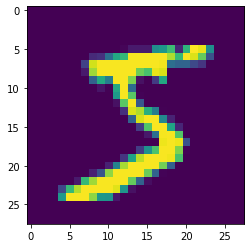

In [28]:
plt.imshow(train_images[0])

We can use a random number generator to sample the training dataset

Image 9528 is labled as: 8


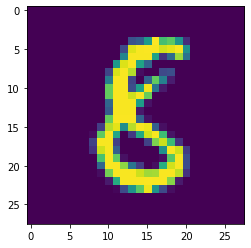

In [68]:
selected = randint(0, len(train_images)-1)
plt.imshow(train_images[selected])
print('Image ' + str(selected) + ' is labled as: ' + str(train_labels[selected]))

### Normalise the data
We are currently using a range of 0 - 255, this causes issues when working with neural networks as deep networks can cause values to explode exponentially.  So we will normalise all of our values to be between 0 to 1.  This is not the only range possible, but is frequently used. We could write a function that does this for all values, making sure to take the highest value equal to 1 and lowest to 0.  

However numpy has again got a very useful interpolation function that can provide us with the answer in one line.

In [62]:
train_images = np.interp(train_images, (train_images.min(), train_images.max()), (0, 1))
test_images = np.interp(test_images, (test_images.min(), test_images.max()), (0, 1))

# Taking a random sample to see if it has worked
for i in range(0,10):
    random_sample = randint(0, len(train_images)-1)
    max_value = np.max(train_images[random_sample])
    min_value = np.min(train_images[random_sample])
    print('Image ' + str(random_sample) + ' max: ' + str(max_value) + ' min: ' + str(min_value))

Image 24185 max: 1.0 min: 0.0
Image 3242 max: 1.0 min: 0.0
Image 20267 max: 1.0 min: 0.0
Image 57635 max: 1.0 min: 0.0
Image 2387 max: 1.0 min: 0.0
Image 5332 max: 0.996078431372549 min: 0.0
Image 9246 max: 1.0 min: 0.0
Image 36272 max: 1.0 min: 0.0
Image 38896 max: 1.0 min: 0.0
Image 31475 max: 1.0 min: 0.0


We can also check that the data hasn't changed the image by re-running our visualisation code again

Image 11846 is labled as: 0


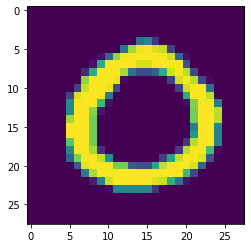

In [64]:
selected = randint(0, len(train_images)-1)
plt.imshow(train_images[selected])
print('Image ' + str(selected) + ' is labled as: ' + str(train_labels[selected]))

### Reshape Data
This is a good start, but currently our data is in a 3 dimentional array of images with each one looking like this:

$$
\begin{bmatrix}
0 & 1 & ... & n-1 & n \\
1 & px & px & px & px \\
\vdots & px & px & px & px \\
n-1 & px & px & px & px \\
n & px & px & px & px
\end{bmatrix}
\cdot m
$$

Where our image is $n\times n$ in size and there are $m$ images in the data set.  This needs to be converted to something that we can input into the first layer of our neural network, and we can to this by adding all of our columns of pixels end to end to form a single vector:

$$
\begin{bmatrix}
0 \\
1 \\
\vdots \\
n^{2}-1 \\
n^{2}
\end{bmatrix}
\cdot m
$$

We can then stack all of our $m$ images together to form a two dimensional $n\times m$ matrix: 

$$
\begin{bmatrix}
0 & 1 & \cdots & m-1 & m \\
1 & \ddots &  &  &  \\
\vdots & & \ddots &  & \vdots \\
n-1 &  &  & \ddots &  \\
n &  & \cdots &  & n \times m
\end{bmatrix}
$$

In [65]:
# First print out the original shapes
print('Train data is: ' + str(np.shape(train_images)))
print('Test data is: ' + str(np.shape(test_images)))

# Using numpy, reshape the array into the desired shape
X_train = train_images.reshape(len(train_images), 28*28)
X_test = test_images.reshape(len(test_images), 28*28)

# Print out the final shape
print('Reshaped train data is: ' + str(np.shape(X_train)))
print('Reshaped test data is: ' + str(np.shape(X_test)))

Train data is: (60000, 28, 28)
Test data is: (10000, 28, 28)
Reshaped train data is: (60000, 784)
Reshaped test data is: (10000, 784)


Now for our labels, we already have an  $m \times 1$  vector so we can simply rename them to `Y_test` and `Y_train` and  confirm that they are the right shapes of (m,) where the lack of a second number means that it is a one dimensional array (or vector). 

In [70]:
# Rename our data
Y_train = train_labels;
Y_test = test_labels;

# Print to confirm
print('Train Y is: ' + str(np.shape(Y_train)))
print('Test Y is: ' + str(np.shape(Y_test)))

Train Y is: (60000,)
Test Y is: (10000,)


#### Now you are ready to build your model!